In [62]:
import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), '../../../../'))
sys.path.append(work_path)
from helper.regrassion import *
from helper.plot import *
from helper.util import *
from helper.analysis import *
from helper.classification import *
import warnings
warnings.filterwarnings(action='ignore')
from seaborn import objects as sns
import re
from sklearn.preprocessing import OneHotEncoder

In [3]:
categories = ['Survived', 'Pclass', 'Sex', 'Embarked']
origin = my_read_excel('C:/Users/Jihwan/Desktop/01Class/E.추론통계/E.InferentialStatistics/수업자료/titanic.xlsx', categories=categories)
my_pretty_table(origin.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     1309 non-null   category
 2   Pclass       1309 non-null   category
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   category
 5   Age          1046 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1308 non-null   float64 
 10  Cabin        295 non-null    object  
 11  Embarked     1307 non-null   category
dtypes: category(4), float64(2), int64(3), object(3)
memory usage: 87.6+ KB
None

데이터프레임 상위 5개 행
+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+---------+------------+
|   

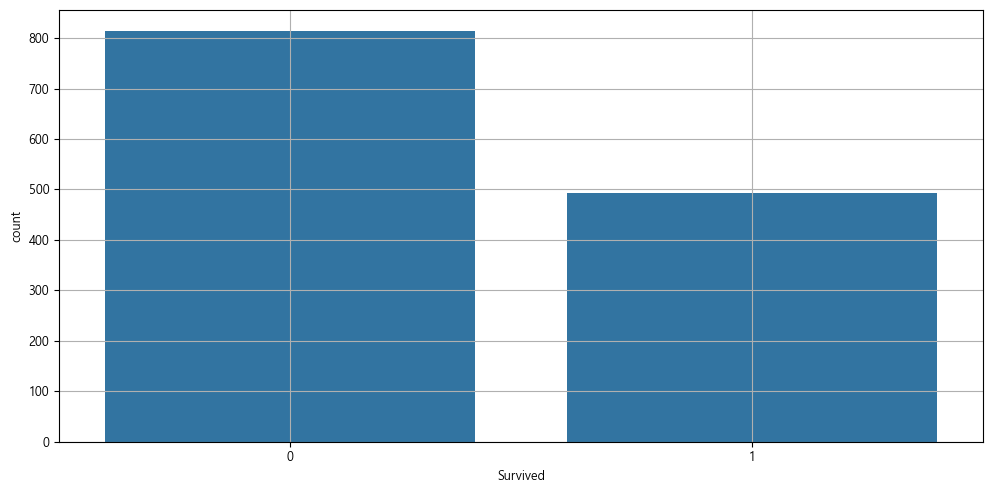

In [4]:
my_countplot(origin, 'Survived')

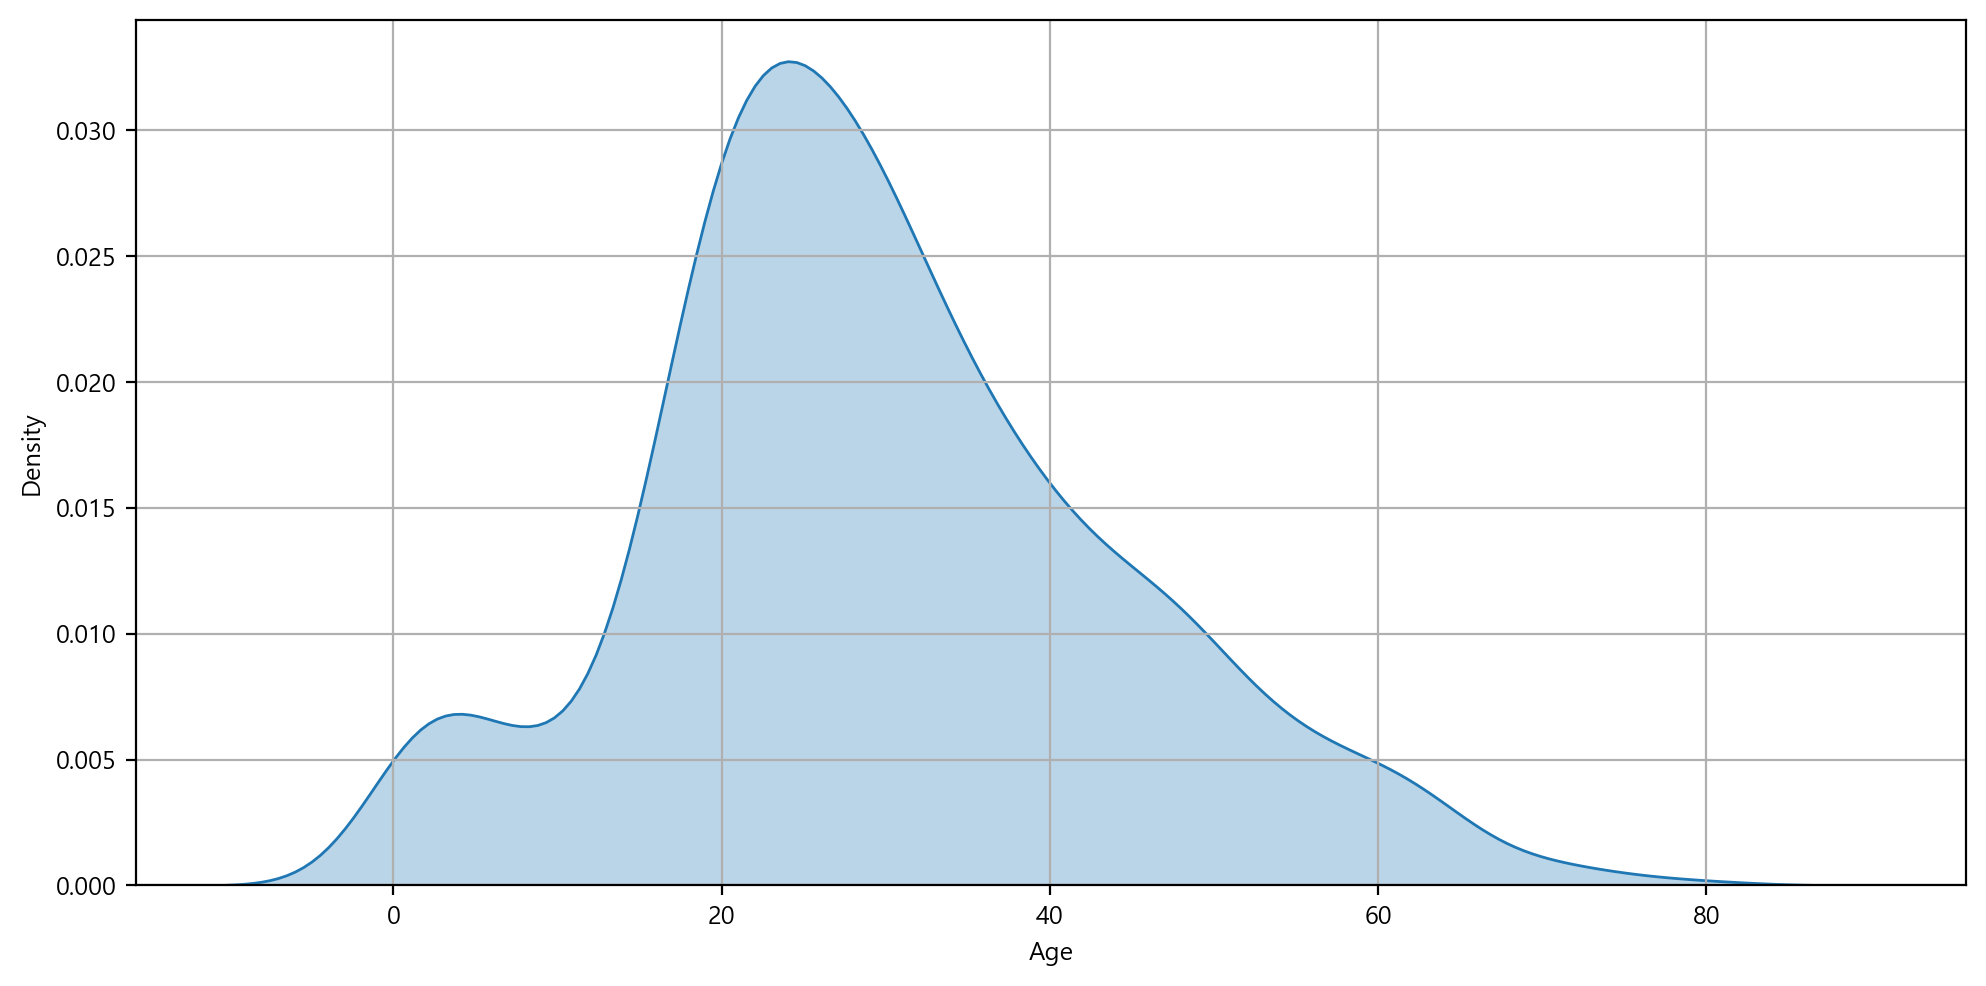

In [5]:
my_kdeplot(origin, 'Age', fill=True, dpi=200)

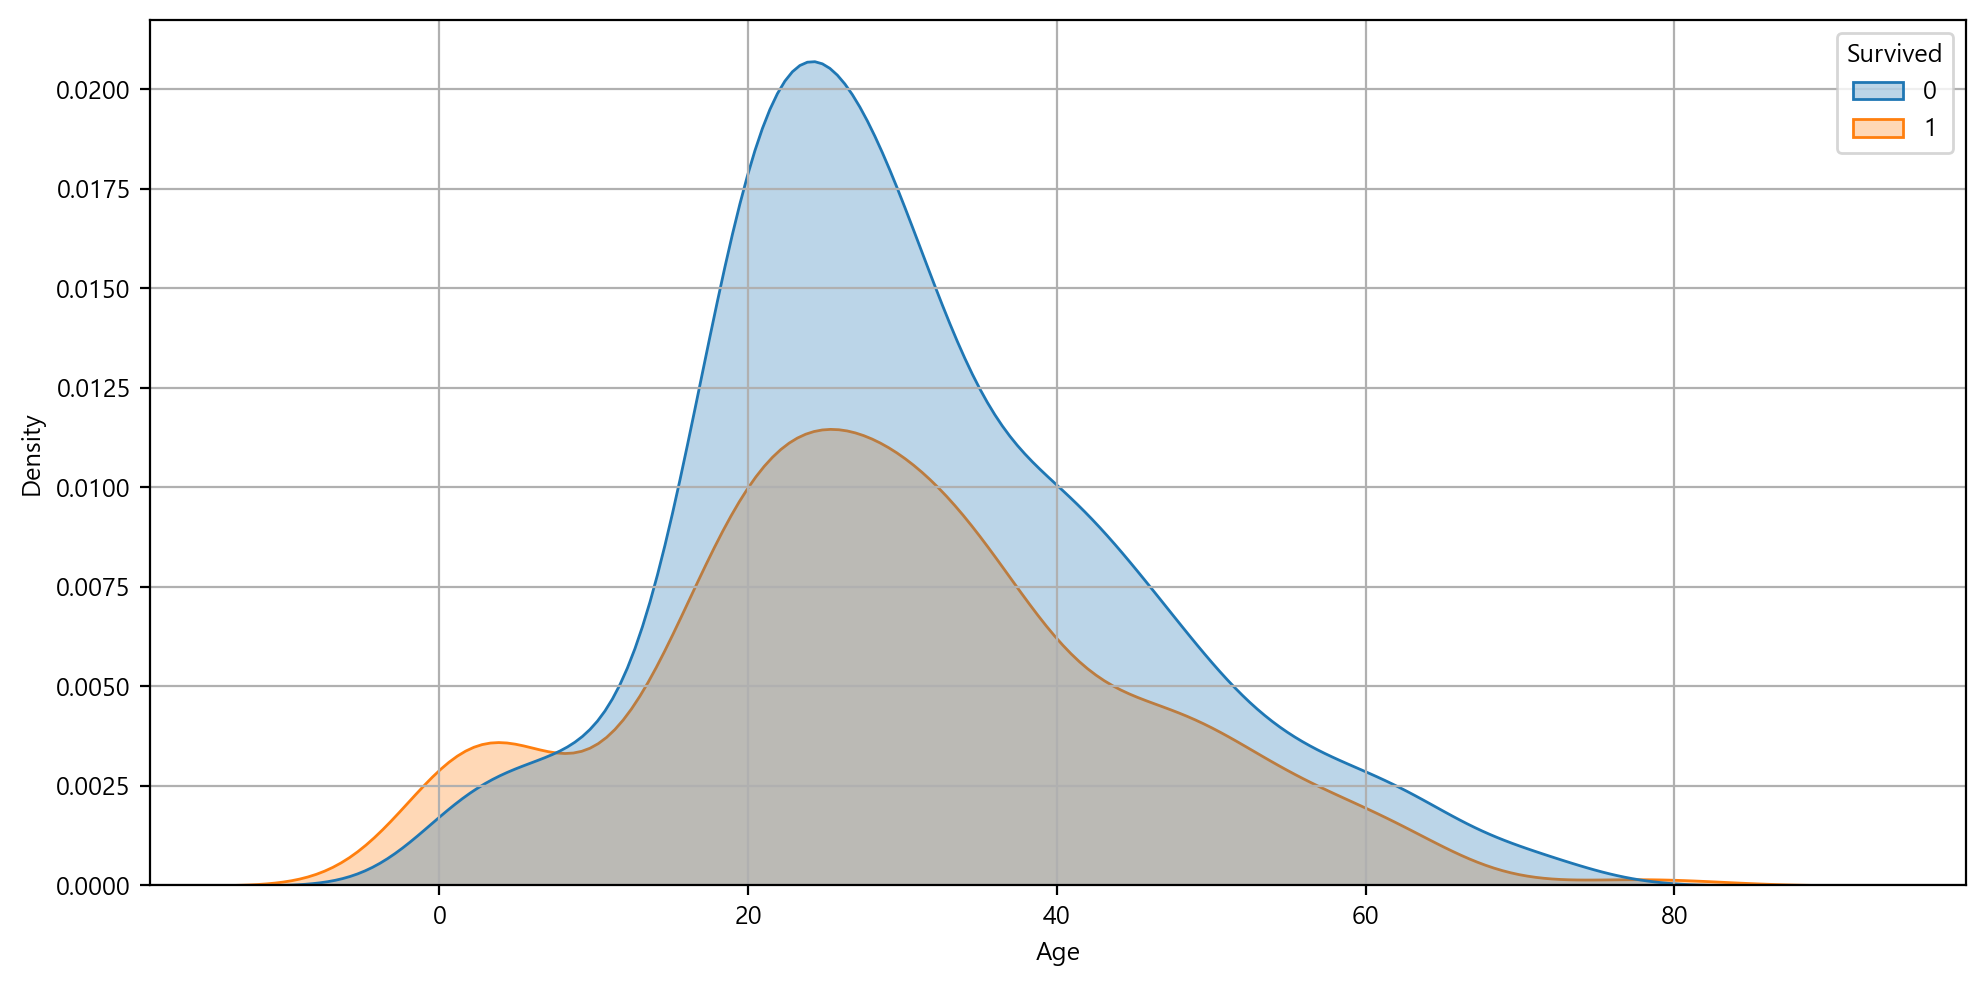

In [6]:
my_kdeplot(origin, 'Age', fill=True, dpi=200, hue='Survived')

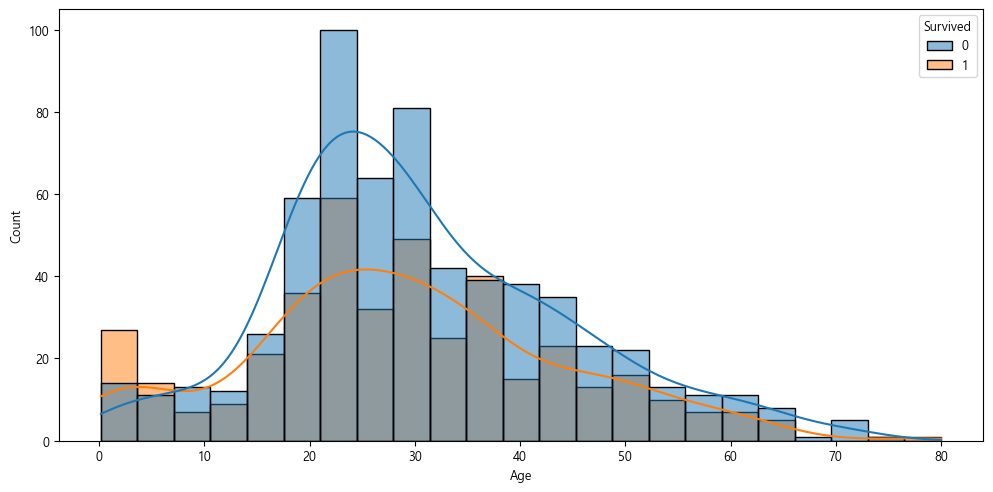

In [7]:
# 나이가 결측치가 많아 결측치를 대체할지 여부를 결정하기 위해 그림
my_histplot(origin, 'Age', hue='Survived')

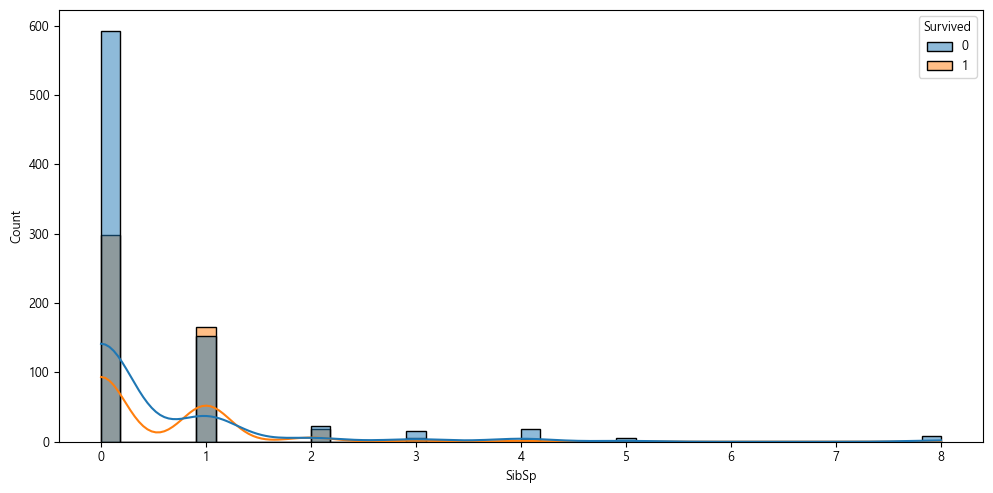

In [8]:
# 형제자매/배우자 수 분포
my_histplot(origin, 'SibSp',hue='Survived')

In [9]:
origin['SibSp'].value_counts().sort_values(ascending=False)

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

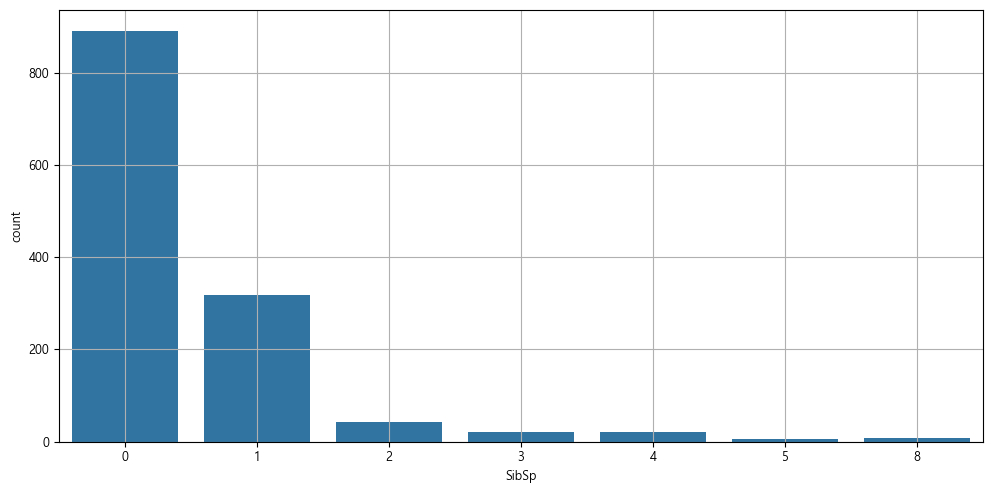

In [10]:
my_countplot(origin, 'SibSp')

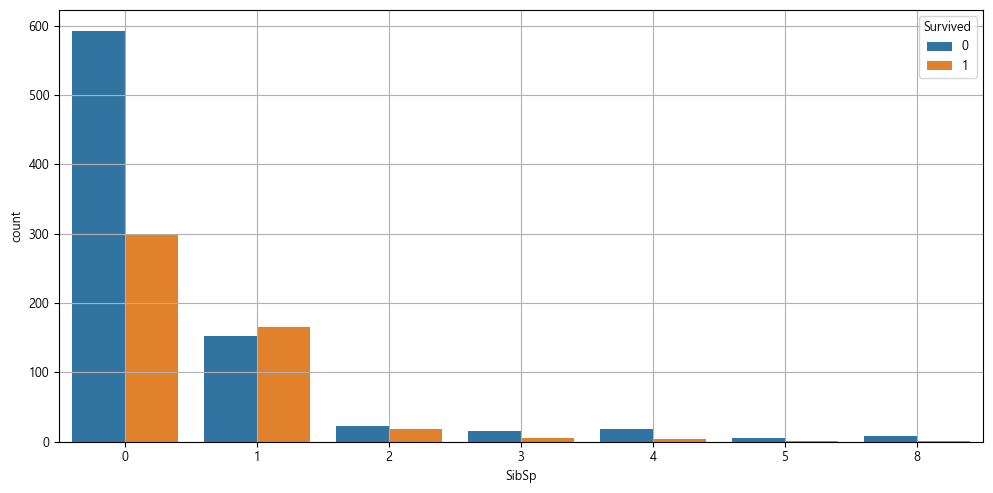

In [11]:
my_countplot(origin, 'SibSp', hue='Survived')

> 생존자가 더 많이 생기는 경우가 있으므로 생존율에 유의미한 영향 주는 요인

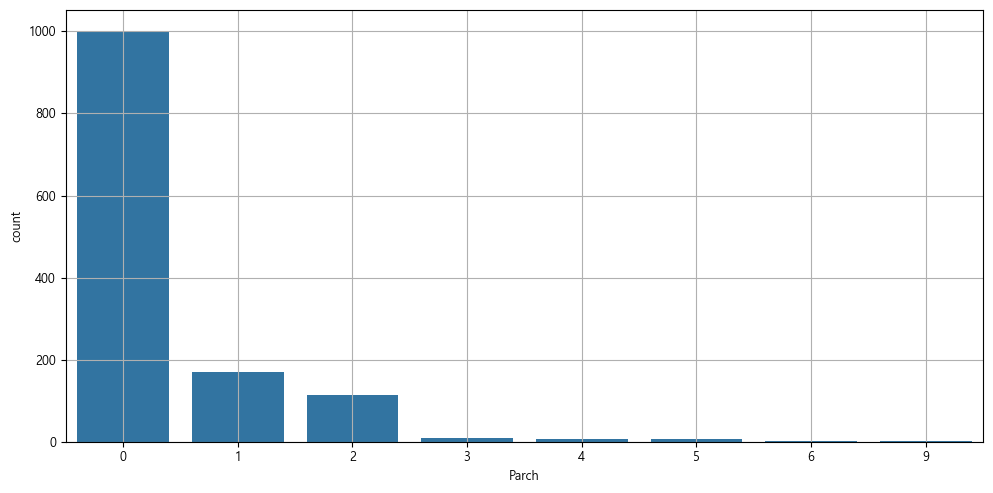

In [12]:
# 부모 혹은 자녀와 같이 탑승한 경우
my_countplot(origin, 'Parch')

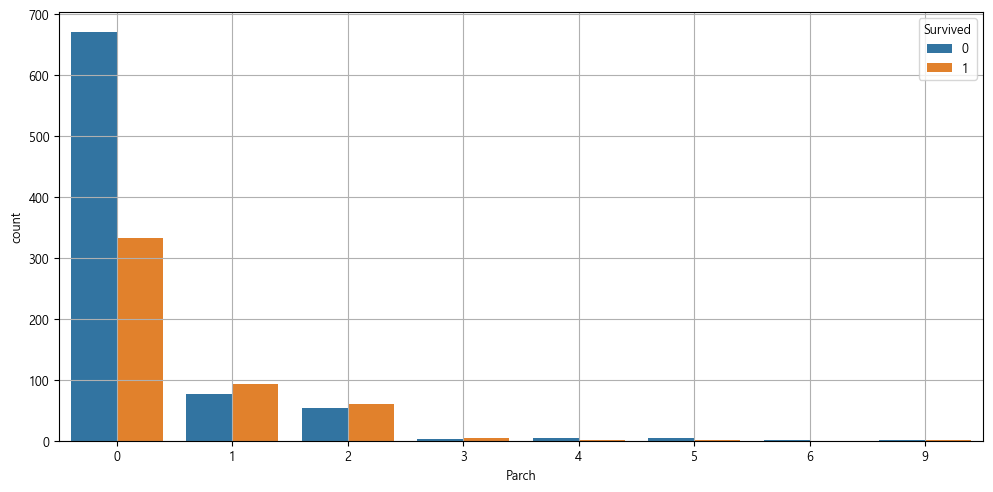

In [13]:
my_countplot(origin, 'Parch', hue='Survived')

In [14]:
# 부모자녀 도 생존여부 유의미한 변수

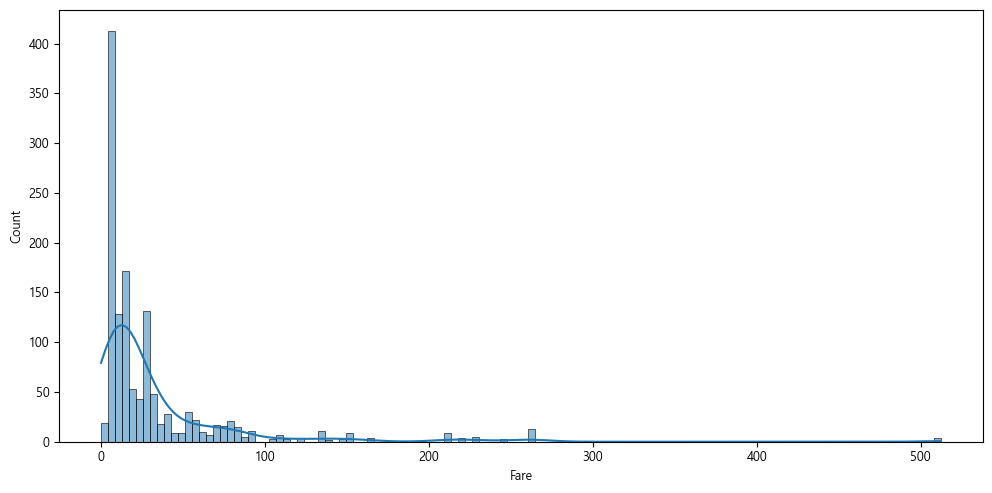

In [15]:
my_histplot(origin, 'Fare')

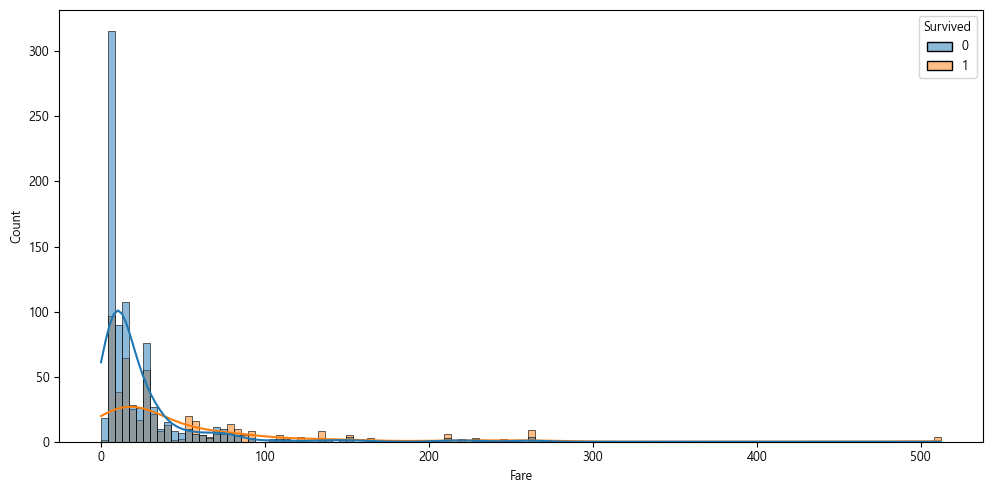

In [16]:
my_histplot(origin, 'Fare', hue='Survived')

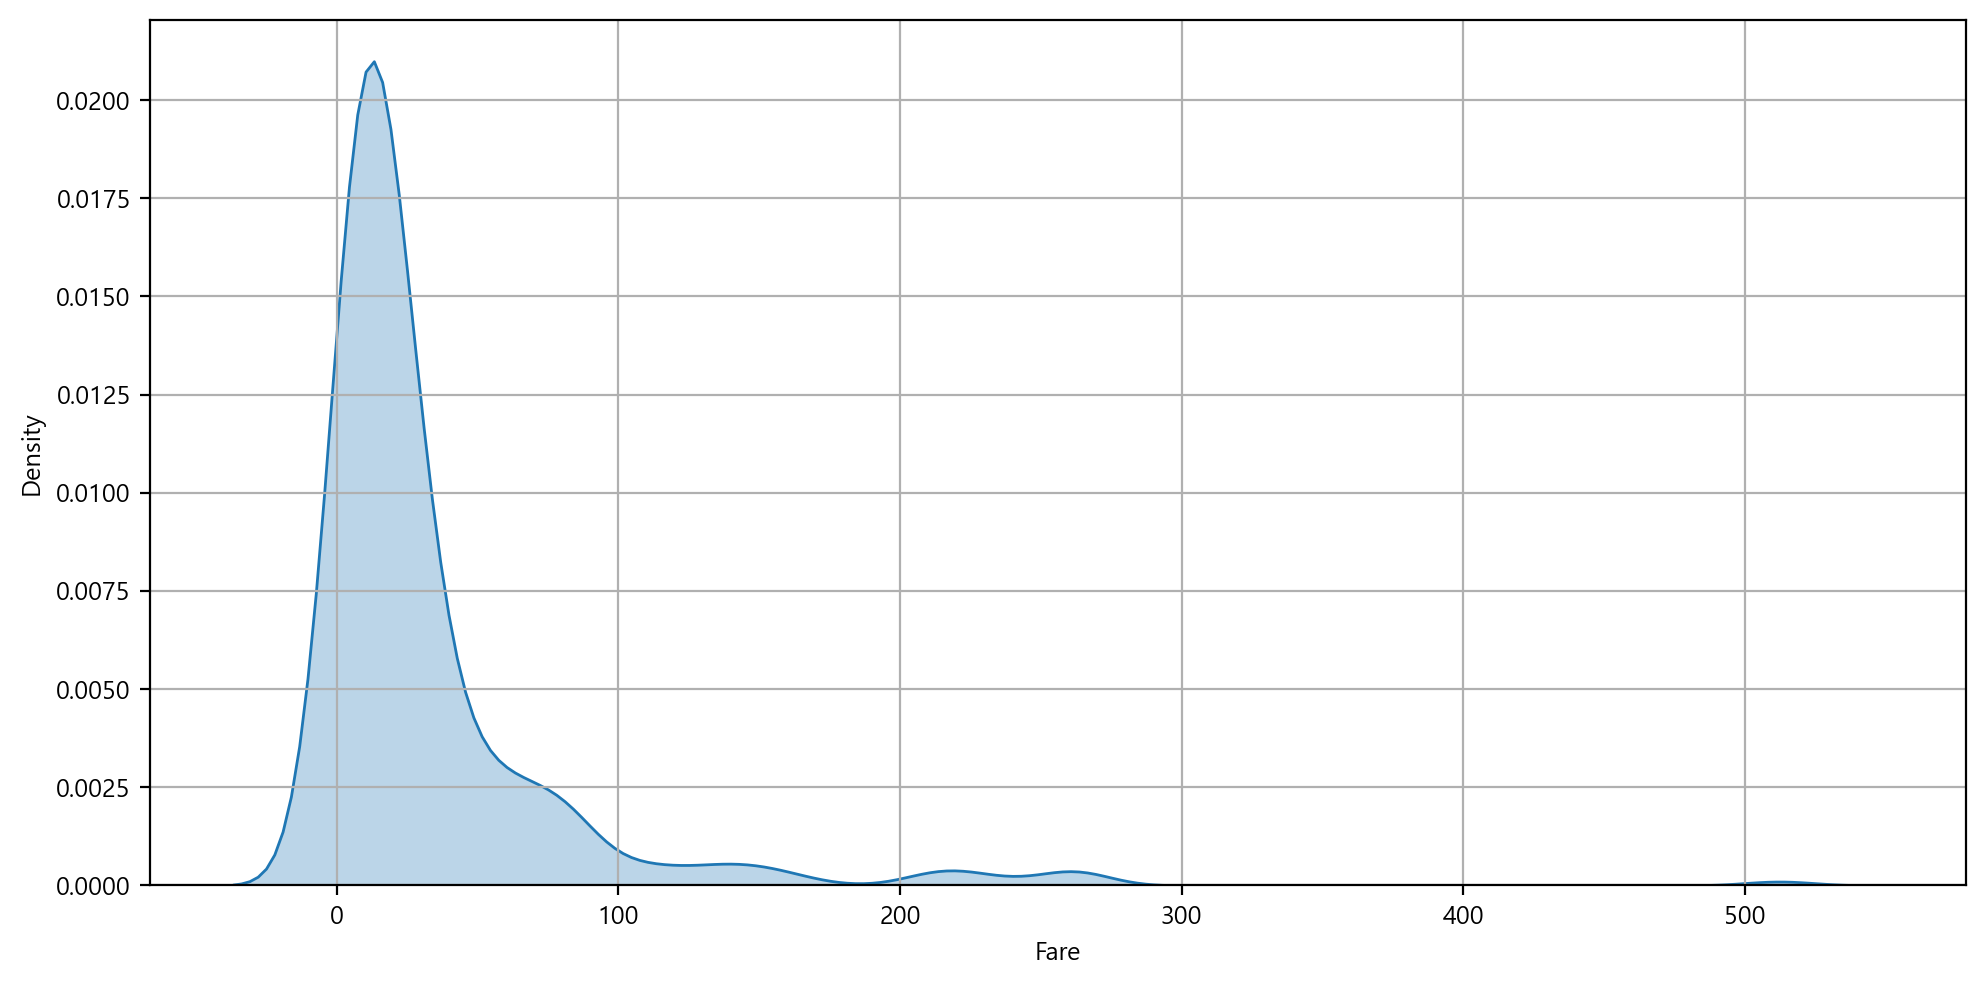

In [17]:
my_kdeplot(origin, 'Fare', fill=True, dpi=200)

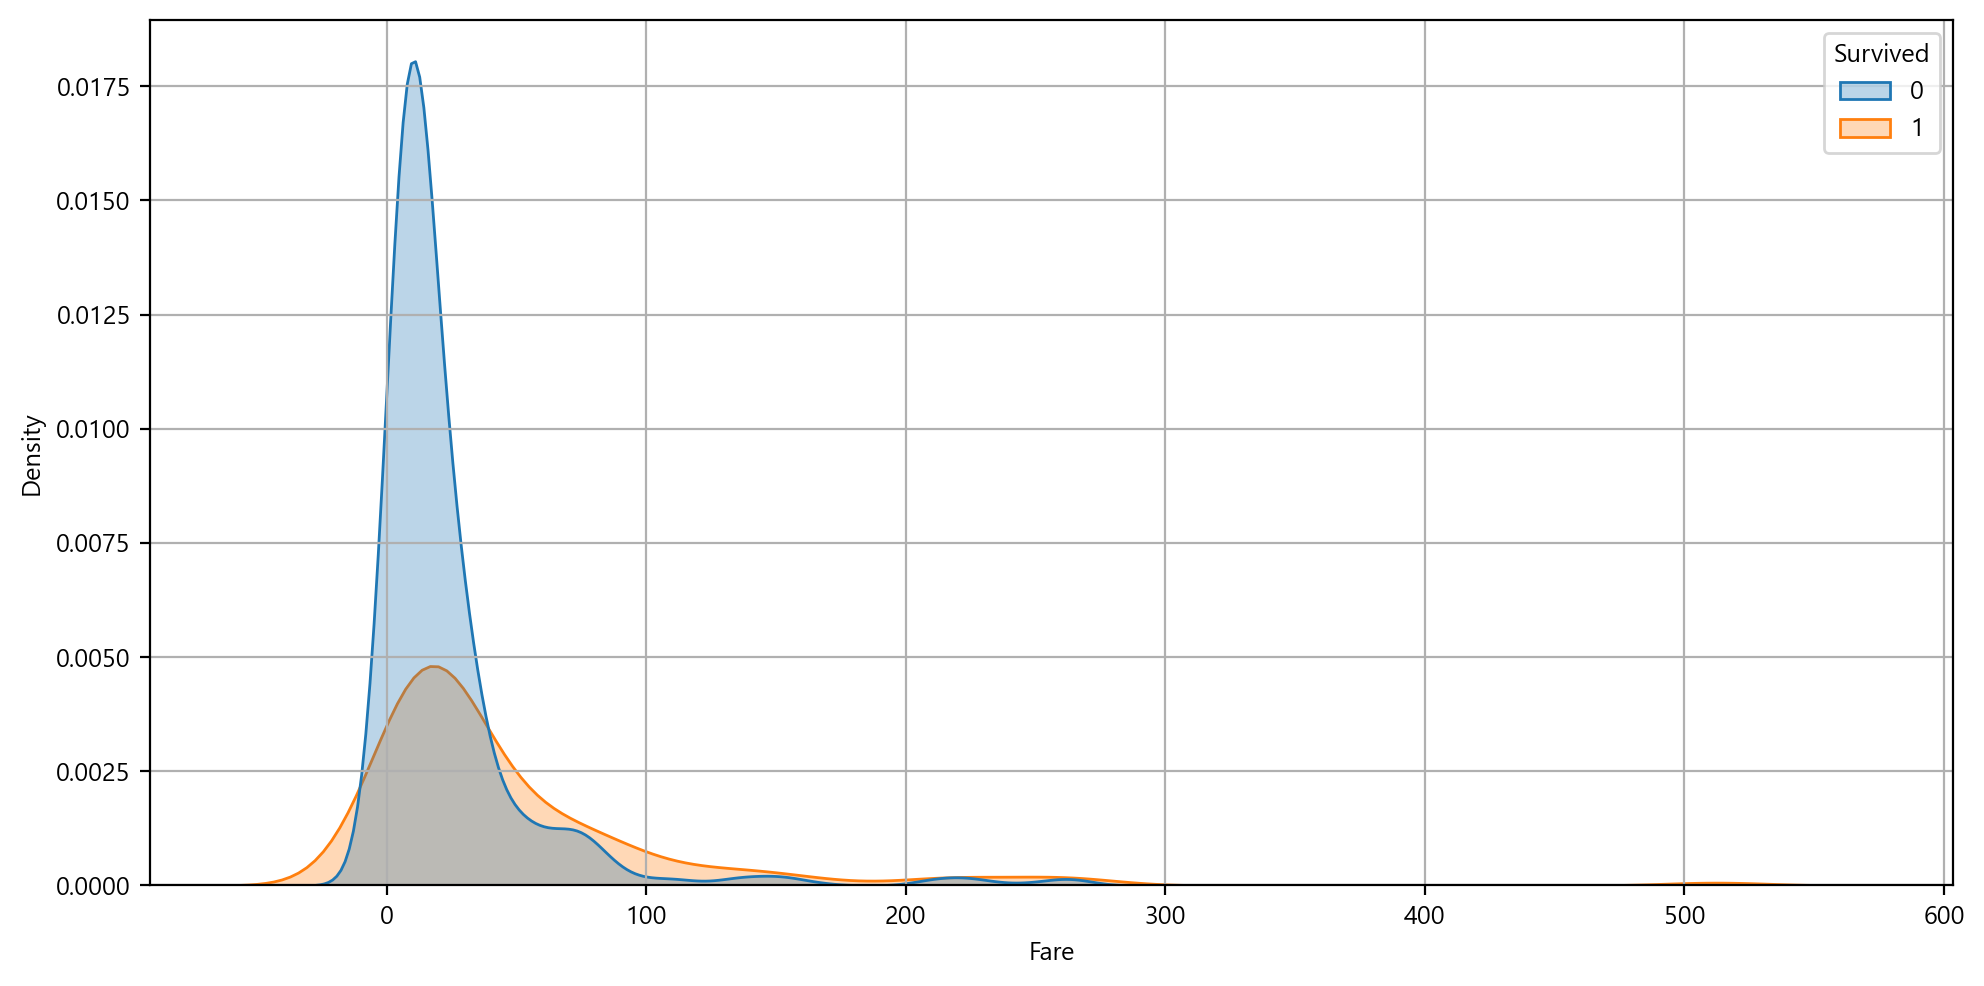

In [18]:
my_kdeplot(origin, 'Fare', fill=True, dpi=200, hue='Survived')

In [19]:
# 여객운임도 생존여부에 영향 주는 요인으로 보임

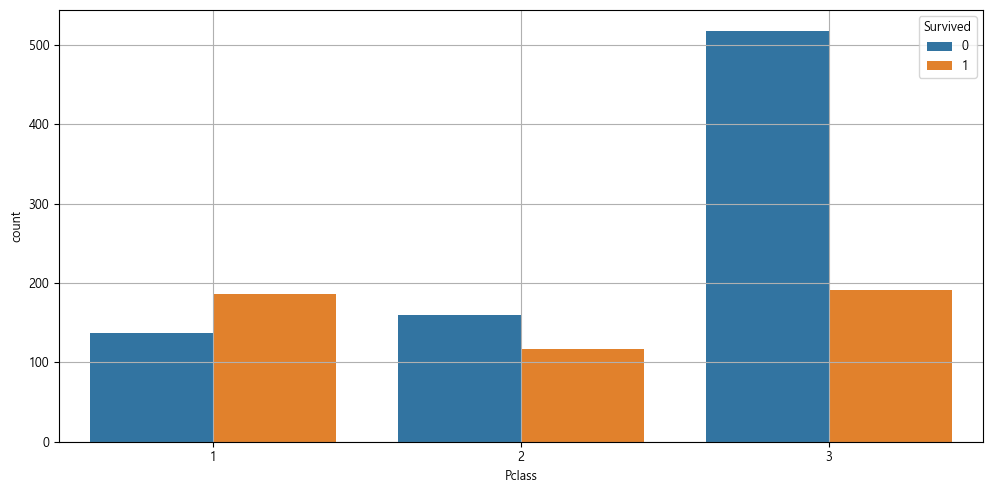

In [20]:
# 티켓 등급에 따른 생존비율
my_countplot(origin, xname='Pclass', hue='Survived')

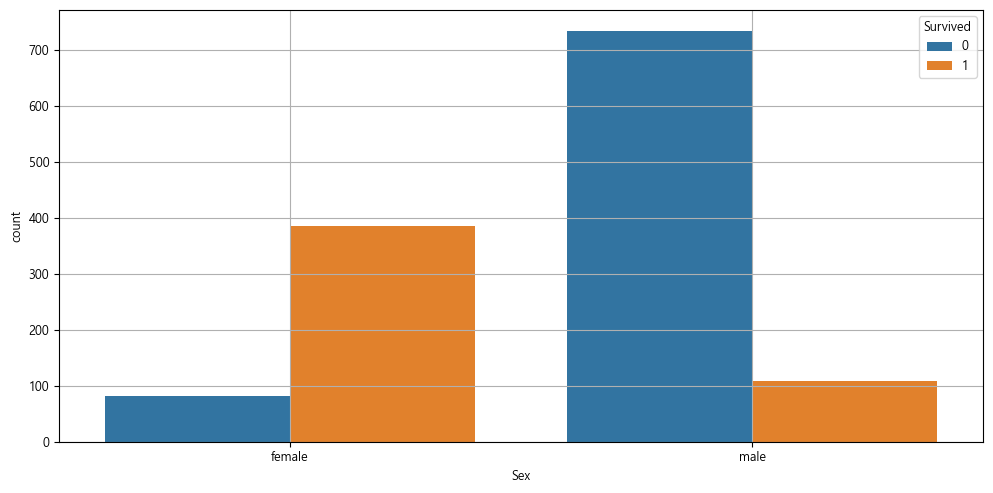

In [21]:
my_countplot(origin, 'Sex', hue='Survived')

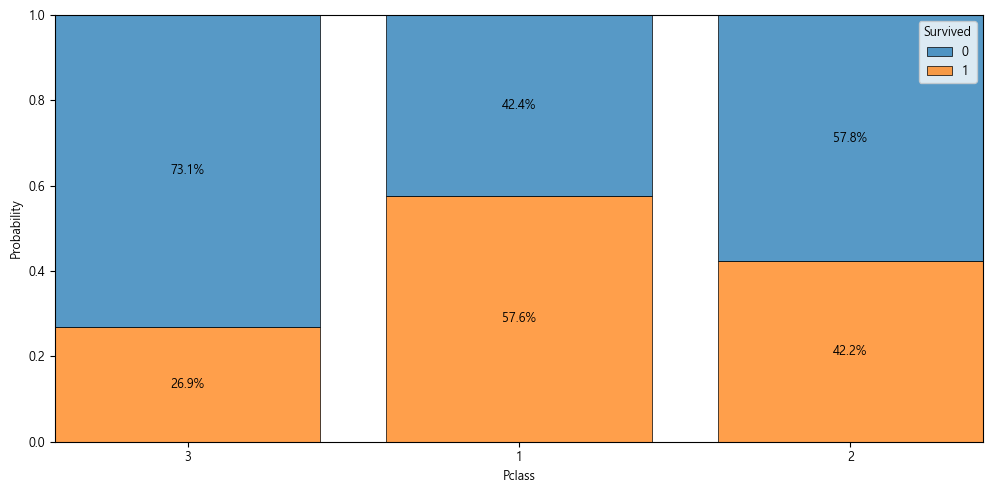

In [22]:
my_stackplot(origin, 'Pclass',hue='Survived')

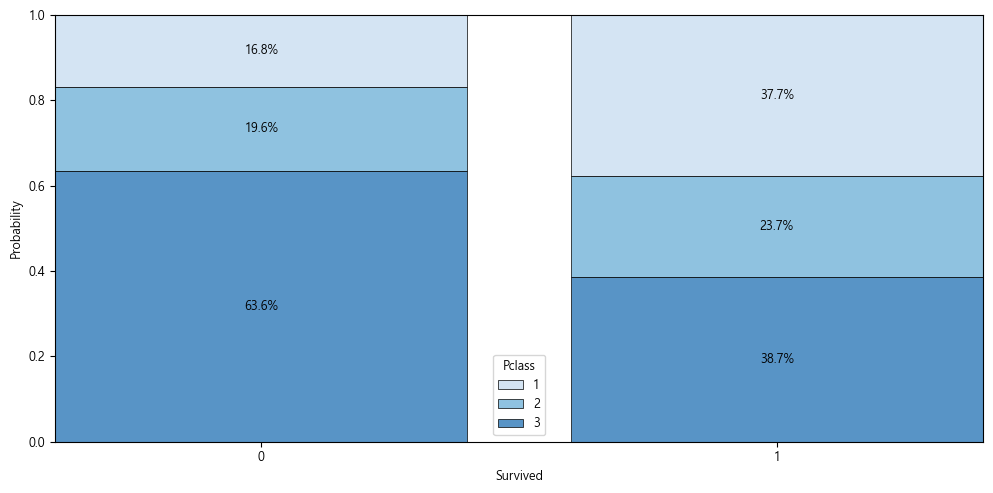

In [23]:
my_stackplot(origin, 'Survived', hue='Pclass', palette='Blues')

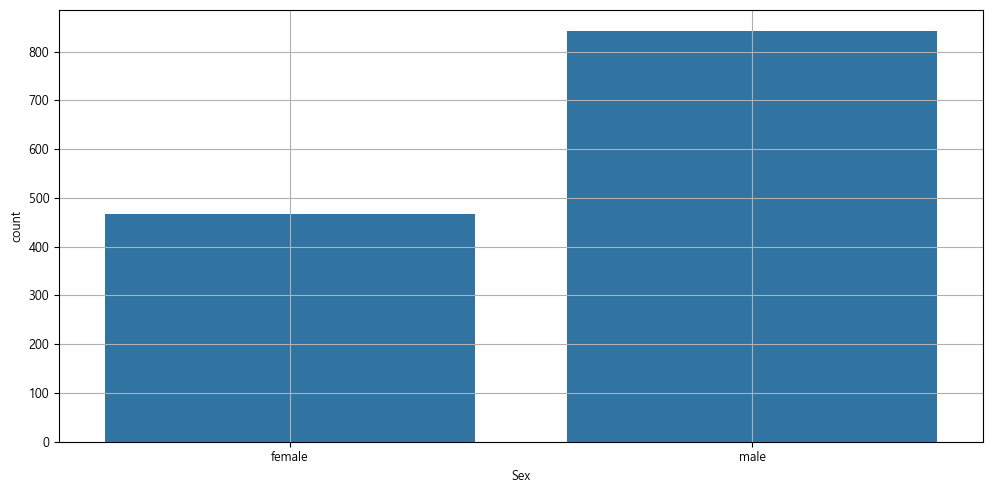

In [24]:
my_countplot(origin, 'Sex')

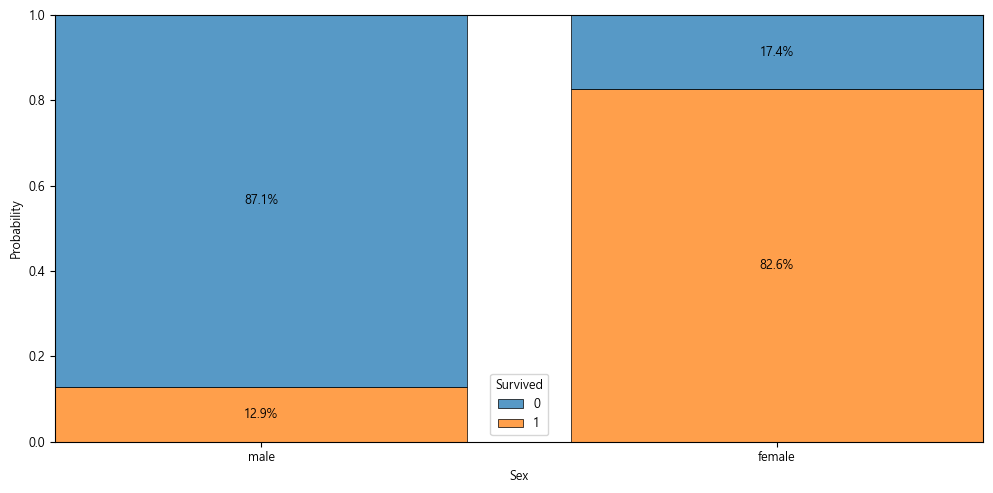

In [25]:
my_stackplot(origin,'Sex', hue='Survived')

In [26]:
# 성별도 생존여부에 유의미한 변수

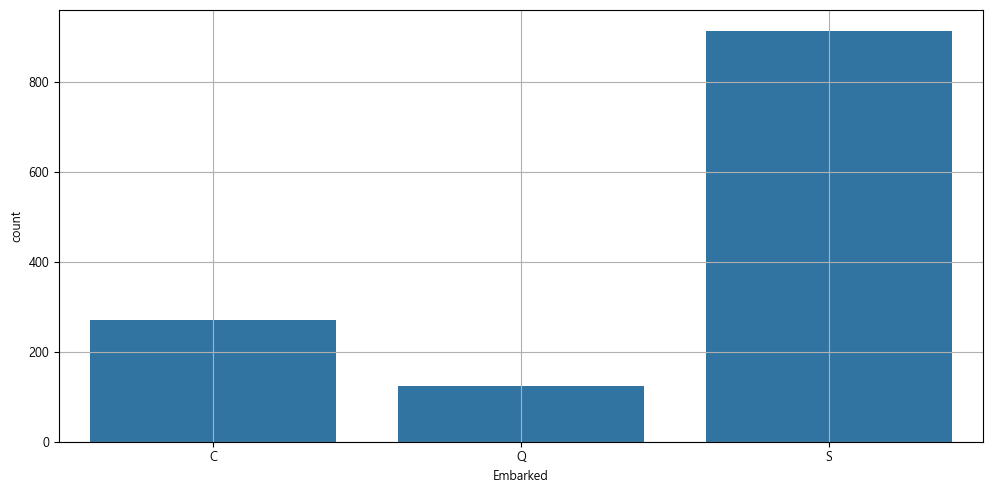

In [27]:
# 탑승지
my_countplot(origin, 'Embarked' )
#sb.countplot(data=origin, x='Embarked')

In [28]:
origin['Embarked'].unique()

['S', 'C', 'Q', NaN]
Categories (3, object): ['C', 'Q', 'S']

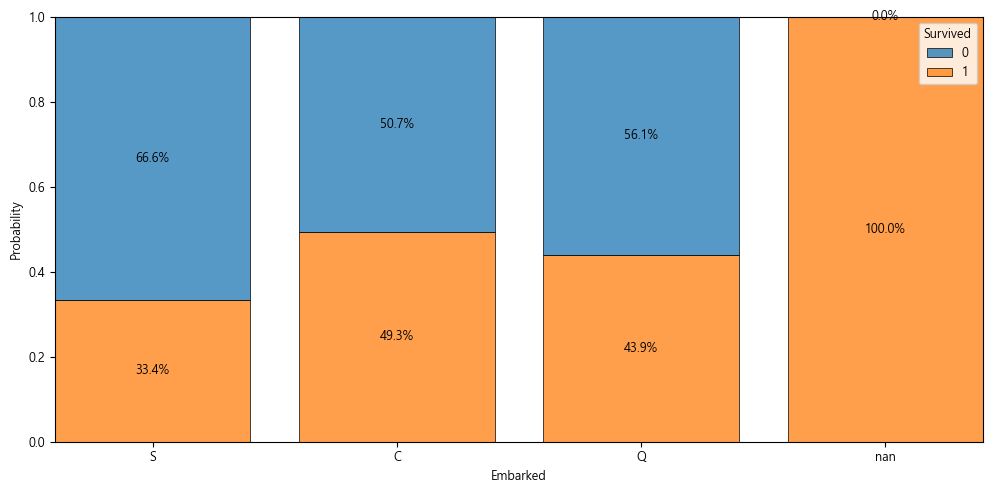

In [29]:
my_stackplot(origin, 'Embarked',hue='Survived')

In [30]:
# 객실번호
origin['Cabin'].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: Cabin, Length: 186, dtype: int64

In [31]:
origin['Survived'] = origin['Survived'].astype('category')
origin.dtypes 

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object

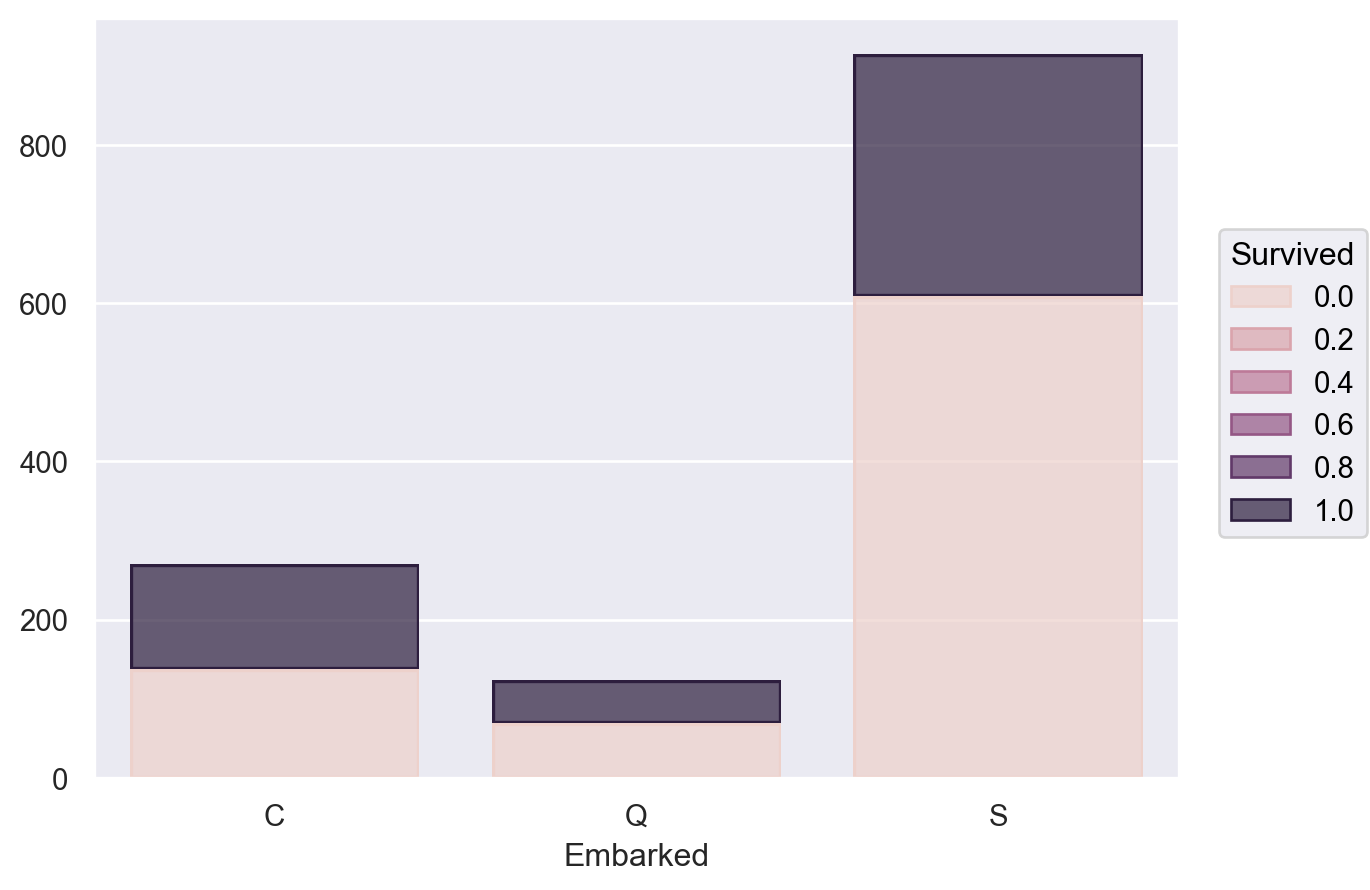

In [32]:
sns.Plot(origin, x='Embarked',color='Survived').add(sns.Bar(), sns.Count(), sns.Stack())

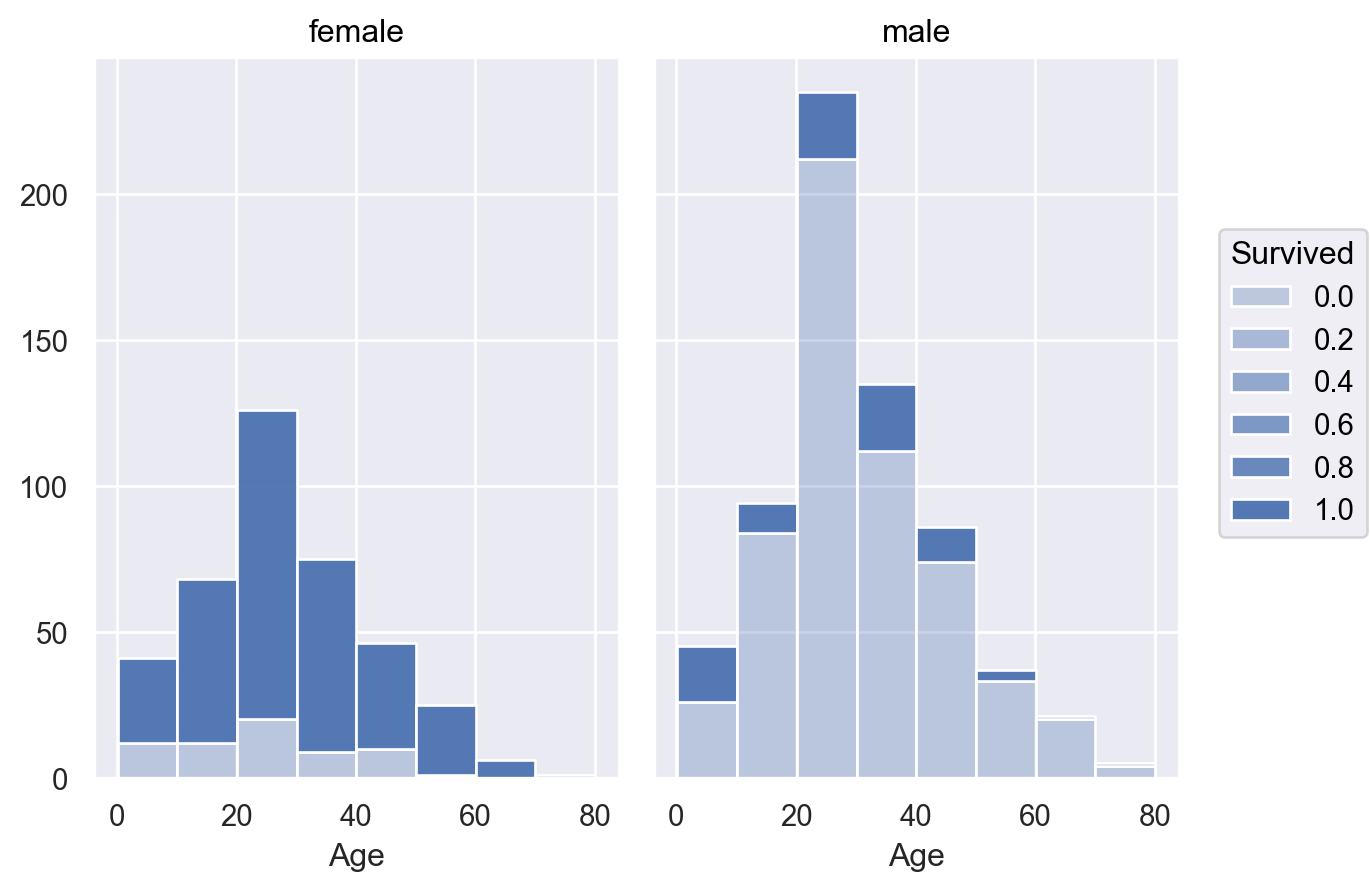

In [33]:
sns.Plot(origin, x='Age', alpha='Survived').facet('Sex').add(sns.Bars(), sns.Hist(binwidth=10), sns.Stack())

In [34]:
# 데이터 전처리

In [35]:
df = origin.drop(['Name', 'Ticket', 'Cabin'], axis=1).set_index('PassengerId')
my_pretty_table(df.head())

+---------------+------------+----------+--------+-------+---------+---------+---------+------------+
|   PassengerId |   Survived |   Pclass | Sex    |   Age |   SibSp |   Parch |    Fare | Embarked   |
|---------------+------------+----------+--------+-------+---------+---------+---------+------------|
|             1 |          0 |        3 | male   |    22 |       1 |       0 |    7.25 | S          |
|             2 |          1 |        1 | female |    38 |       1 |       0 | 71.2833 | C          |
|             3 |          1 |        3 | female |    26 |       0 |       0 |   7.925 | S          |
|             4 |          1 |        1 | female |    35 |       1 |       0 |    53.1 | S          |
|             5 |          0 |        3 | male   |    35 |       0 |       0 |    8.05 | S          |
+---------------+------------+----------+--------+-------+---------+---------+---------+------------+


In [36]:
df_age = my_replace_missing_value(df[['Age']])
df_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     1309 non-null   float64
dtypes: float64(1)
memory usage: 20.5 KB


In [37]:
df['Age'] = df_age['Age']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  1309 non-null   category
 1   Pclass    1309 non-null   category
 2   Sex       1309 non-null   category
 3   Age       1309 non-null   float64 
 4   SibSp     1309 non-null   int64   
 5   Parch     1309 non-null   int64   
 6   Fare      1308 non-null   float64 
 7   Embarked  1307 non-null   category
dtypes: category(4), float64(2), int64(2)
memory usage: 56.7 KB


In [38]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    2
dtype: int64

In [39]:
df2 = df.dropna()
df2.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [40]:
# 스케일링
df3 = my_standard_scaler(df2, 'Survived')
my_pretty_table(df3.head())

+---------------+-----------+-----------+-----------+-----------+----------+--------+------------+------------+
|   PassengerId |       Age |     SibSp |     Parch |      Fare |   Pclass | Sex    | Embarked   |   Survived |
|---------------+-----------+-----------+-----------+-----------+----------+--------+------------+------------|
|             1 | -0.609933 |  0.479763 | -0.445612 | -0.501949 |        3 | male   | S          |          0 |
|             2 |  0.636914 |  0.479763 | -0.445612 |  0.735501 |        1 | female | C          |          1 |
|             3 | -0.298221 | -0.479763 | -0.445612 | -0.488905 |        3 | female | S          |          1 |
|             4 |   0.40313 |  0.479763 | -0.445612 |  0.384107 |        1 | female | S          |          1 |
|             5 |   0.40313 | -0.479763 | -0.445612 | -0.486489 |        3 | male   | S          |          0 |
+---------------+-----------+-----------+-----------+-----------+----------+--------+------------+------

In [41]:
# 성별데이터 라벨링
df4 = my_labelling(df3, 'Sex')
df4.head()

,Age,SibSp,Parch,Fare,Pclass,Sex,Embarked,Survived
PassengerId,,,,,,,,
1,-0.609933,0.479763,-0.445612,-0.501949,3,1,S,0
2,0.636914,0.479763,-0.445612,0.735501,1,0,C,1
3,-0.298221,-0.479763,-0.445612,-0.488905,3,0,S,1
4,0.403130,0.479763,-0.445612,0.384107,1,0,S,1
5,0.403130,-0.479763,-0.445612,-0.486489,3,1,S,0


In [42]:
df4.head()
df_onehot = df4.copy()

In [43]:
# 더미변수화
df5 = my_dummies(df4, "Pclass", 'Embarked')
df5.head()

,Age,SibSp,Parch,Fare,Sex,Survived,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,-0.609933,0.479763,-0.445612,-0.501949,1,0,0,1,0,1
2,0.636914,0.479763,-0.445612,0.735501,0,1,0,0,0,0
3,-0.298221,-0.479763,-0.445612,-0.488905,0,1,0,1,0,1
4,0.403130,0.479763,-0.445612,0.384107,0,1,0,0,0,1
5,0.403130,-0.479763,-0.445612,-0.486489,1,0,0,1,0,1


In [44]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Age         1306 non-null   float64 
 1   SibSp       1306 non-null   float64 
 2   Parch       1306 non-null   float64 
 3   Fare        1306 non-null   float64 
 4   Sex         1306 non-null   int32   
 5   Survived    1306 non-null   category
 6   Pclass_2    1306 non-null   uint8   
 7   Pclass_3    1306 non-null   uint8   
 8   Embarked_Q  1306 non-null   uint8   
 9   Embarked_S  1306 non-null   uint8   
dtypes: category(1), float64(4), int32(1), uint8(4)
memory usage: 62.6 KB


In [45]:
# categoryt타입 종속변수
df5['Survived'] = df5['Survived'].astype('int') 

In [46]:
df5.head()

,Age,SibSp,Parch,Fare,Sex,Survived,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,-0.609933,0.479763,-0.445612,-0.501949,1,0,0,1,0,1
2,0.636914,0.479763,-0.445612,0.735501,0,1,0,0,0,0
3,-0.298221,-0.479763,-0.445612,-0.488905,0,1,0,1,0,1
4,0.403130,0.479763,-0.445612,0.384107,0,1,0,0,0,1
5,0.403130,-0.479763,-0.445612,-0.486489,1,0,0,1,0,1


In [47]:
# 훈련 검증데이터 분할
x_train, x_test, y_train, y_test = my_train_test_split(df5, yname='Survived')
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1044, 9), (262, 9), (1044,), (262,))

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
| 13 |    10 | l2        |          0.856321 |
| 16 |   100 | l2        |          0.856321 |
| 10 |     1 | l2        |          0.854403 |
|  7 |   0.1 | l2        |          0.851537 |
|  4 |  0.01 | l2        |          0.781625 |
|  1 | 0.001 | l2        |          0.636019 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.438352 |      0.45541 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy)        |     0.858238 |     0.851145 | 예측 결과(TN,FP,TP,TN)가 실제 결과

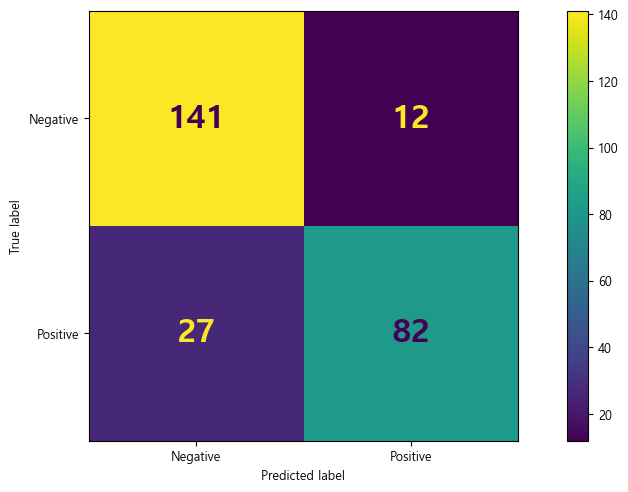


[ROC/PR Curve]


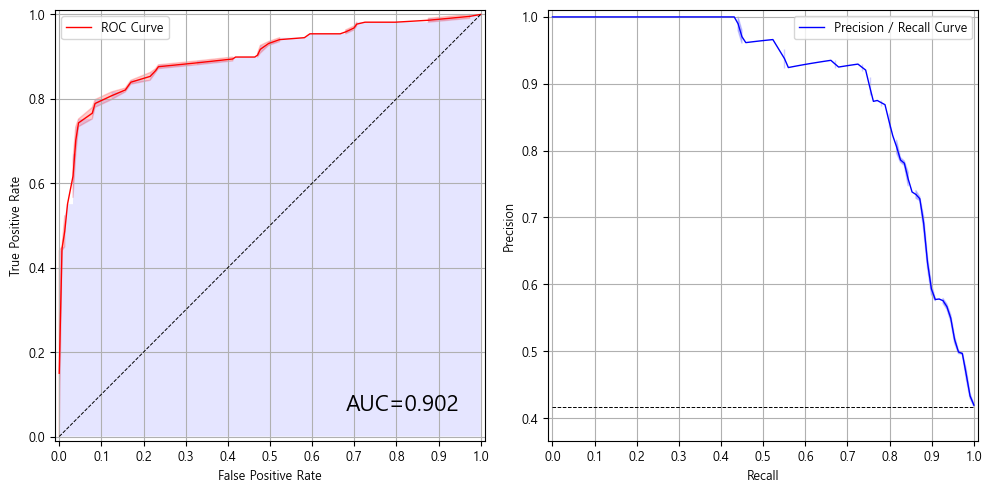


[학습곡선]


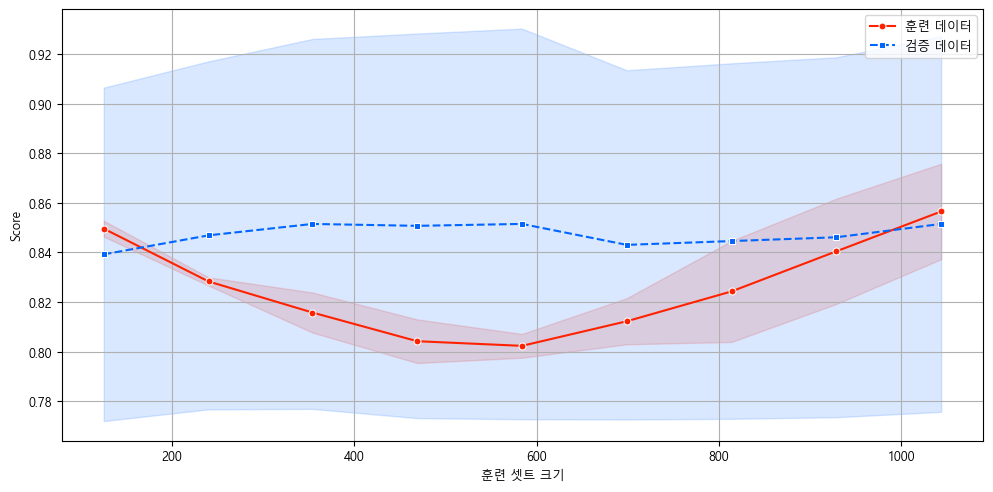

+----+------------+------------+--------------------+------------+---------+------------+------------+
|    | 종속변수   | 독립변수   |   B(비표준화 계수) |   표준오차 |       t |   유의확률 |   OddsRate |
|----+------------+------------+--------------------+------------+---------+------------+------------|
|  0 | Survived   | Age        |            -0.3706 |      0.207 | -1.7894 |      0.074 |     0.6903 |
|  1 | Survived   | SibSp      |            -0.3495 |      0.273 | -1.2784 |      0.201 |     0.7051 |
|  2 | Survived   | Parch      |            -0.0598 |      0.303 |  -0.197 |      0.844 |      0.942 |
|  3 | Survived   | Fare       |             0.1603 |      0.301 |  0.5325 |      0.594 |     1.1739 |
|  4 | Survived   | Sex        |            -3.6728 |       0.42 | -8.7477 |          0 |     0.0254 |
|  5 | Survived   | Pclass_2   |            -0.8571 |      0.625 | -1.3725 |       0.17 |     0.4244 |
|  6 | Survived   | Pclass_3   |            -1.8734 |      0.617 | -3.0341 |      0.002 |     0

In [48]:
estimator = my_logistic_classification(x_train,y_train,x_test,y_test)

In [55]:
#Age	SibSp	Parch	Fare	Sex	Survived	Pclass_2	Pclass_3	Embarked_Q	Embarked_S
mydf= DataFrame([
    {'Age':19, 'SibSp':0,'Parch':0, 'Fare':0, 'Sex':1, 'Pclass_2':0,'Pclass_3':1,'Embarked_Q':0, 'Embarked_S':1},
    {'Age':17, 'SibSp':1,'Parch':1, 'Fare':100, 'Sex':0, 'Pclass_2':0,'Pclass_3':0 , 'Embarked_Q':1, 'Embarked_S':0},
    {'Age':33, 'SibSp':0,'Parch':4, 'Fare':50, 'Sex':1, 'Pclass_2':1,'Pclass_3':0, 'Embarked_Q':0, 'Embarked_S':1}

], index=['dicaprio','kate','me'])
mydf.head()

,Age,SibSp,Parch,Fare,Sex,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
dicaprio,19,0,0,0,1,0,1,0,1
kate,17,1,1,100,0,0,0,1,0
me,33,0,4,50,1,1,0,0,1


In [50]:
#Age	SibSp	Parch	Fare	Sex	Survived	Pclass_2	Pclass_3	Embarked_Q	Embarked_S
mydf= DataFrame([
    {'Age':19, 'SibSp':0,'Parch':0, 'Fare':0, 'Sex':1, 'Pclass':1,'Embarked':'C'},
    {'Age':17, 'SibSp':1,'Parch':1, 'Fare':100, 'Sex':0, 'Pclass':3,'Embarked':'Q'},
    {'Age':33, 'SibSp':1,'Parch':1, 'Fare':100, 'Sex':1, 'Pclass':3,'Embarked':'Q'}

], index=['dicaprio','kate','me'])
mydf.head()

,Age,SibSp,Parch,Fare,Sex,Pclass,Embarked
dicaprio,19,0,0,0,1,1,C
kate,17,1,1,100,0,3,Q
me,33,1,1,100,1,3,Q


In [51]:
# 전처리
tmp = mydf[['Age','SibSp','Parch','Fare']]
mydf1 = my_standard_scaler(tmp)
mydf1

,Age,SibSp,Parch,Fare
dicaprio,-0.561951,-1.414214,-1.414214,-1.414214
kate,-0.842927,0.707107,0.707107,0.707107
me,1.404879,0.707107,0.707107,0.707107


In [56]:
mydf[['Age','SibSp','Parch','Fare']] = mydf1[['Age','SibSp','Parch','Fare']]
mydf

,Age,SibSp,Parch,Fare,Sex,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
dicaprio,-0.561951,-1.414214,-1.414214,-1.414214,1,0,1,0,1
kate,-0.842927,0.707107,0.707107,0.707107,0,0,0,1,0
me,1.404879,0.707107,0.707107,0.707107,1,1,0,0,1


In [57]:
pred = estimator.predict_proba(mydf)
pred

array([[0.91001081, 0.08998919],
       [0.03343023, 0.96656977],
       [0.92787061, 0.07212939]])

In [58]:
for i in range(0, len(mydf.index)):
    print(f'{mydf.index[i]}님의 생존 확률은 {round(pred[i][1],2)}%  입니다.')

dicaprio님의 생존 확률은 0.09%  입니다.
kate님의 생존 확률은 0.97%  입니다.
me님의 생존 확률은 0.07%  입니다.


> onehotencoder로 더미변수화

In [ ]:
oh = OneHotEncoder(sparse=False,handle_unknown='ignore')

In [ ]:
dummy = df5[['Pclass_2','Pclass_3','Embarked_Q','Embarked_S']]
dummy.values
# dummy['Pclass'] = dummy['Pclass'].astype('str')
dummy.values.reshape(-1,1)


array([[0],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=uint8)

In [ ]:
oh.fit(dummy.values.reshape(-1,1))

OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [ ]:
oh.transform(dummy.values.reshape(-1,1))

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [ ]:
#dummytest = np.array(['1'],['0'])

In [ ]:
dummy = mydf[['Pclass','Embarked']]
dummy.info()
dummy['Pclass'] = dummy['Pclass'].astype('str')
dummy.values.reshape(-1,1)


<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, dicaprio to me
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    3 non-null      int64 
 1   Embarked  3 non-null      object
dtypes: int64(1), object(1)
memory usage: 72.0+ bytes


array([['1'],
       ['C'],
       ['3'],
       ['Q'],
       ['3'],
       ['Q']], dtype=object)

In [ ]:
dummy.values

array([['1', 'C'],
       ['3', 'Q'],
       ['3', 'Q']], dtype=object)

In [ ]:
oh.fit(dummy.values.reshape(-1,1))

OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [ ]:
oh.transform(dummy.values.reshape(-1,1))

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

In [ ]:
oh.categories_

[array(['1', '3', 'C', 'Q'], dtype=object)]

In [ ]:
oh = OneHotEncoder(sparse=False,handle_unknown='ignore')
mydf.values
mydf.values.reshape(-1,1)
#oh.fit(mydf)
# oh.categories_
# oh.get_feature_names_out(['Pclass','Embarked'])

array([[-0.5619514869490164],
       [-1.414213562373095],
       [-1.414213562373095],
       [-1.4142135623730951],
       [1],
       [1],
       ['C'],
       [-0.8429272304235246],
       [0.7071067811865476],
       [0.7071067811865476],
       [0.7071067811865474],
       [0],
       [3],
       ['Q'],
       [1.404878717372541],
       [0.7071067811865476],
       [0.7071067811865476],
       [0.7071067811865474],
       [1],
       [3],
       ['Q']], dtype=object)

In [ ]:
# onehotencoder  활용 더미변수 생성

In [63]:
ohe = OneHotEncoder(sparse=False)
train_set = ohe.fit_transform(df_onehot[['Pclass','Embarked']])
train_set

array([[0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0.]])

In [87]:
df_dummy = df_onehot[['Pclass','Embarked']]
len(df_dummy.columns)


2

In [81]:
ohe.categories_[0]

array([1, 2, 3], dtype=int64)

In [80]:
df_onehot['Embarked'].unique()

['S', 'C', 'Q']
Categories (3, object): ['C', 'Q', 'S']

In [82]:
df_onehot.head()

,Age,SibSp,Parch,Fare,Pclass,Sex,Embarked,Survived
PassengerId,,,,,,,,
1,-0.609933,0.479763,-0.445612,-0.501949,3,1,S,0
2,0.636914,0.479763,-0.445612,0.735501,1,0,C,1
3,-0.298221,-0.479763,-0.445612,-0.488905,3,0,S,1
4,0.403130,0.479763,-0.445612,0.384107,1,0,S,1
5,0.403130,-0.479763,-0.445612,-0.486489,3,1,S,0


In [ ]:
DataFrame(train_set, columns=[col1 for col1 in df_onehot.columns[4]])